In [ ]:
# Libraries are imported
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Datasets are loaded
insta = pd.read_csv('instacart_orders.csv', sep= ';')
prod = pd.read_csv('products.csv', sep= ';')
ais = pd.read_csv('aisles.csv', sep= ';')
dep = pd.read_csv('departments.csv', sep= ';')
order = pd.read_csv('order_products.csv', sep= ';')

In [ ]:
# Information is displayed
insta.info()
print(insta.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [ ]:
# Information is displayed
prod.info()
print(prod.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   
5           6                                       Dry Nose Oil        11   
6           7                     Pure

In [ ]:
# Information is displayed
ais.info()
print(ais.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
5         6                       other
6         7               packaged meat
7         8             bakery desserts
8         9                 pasta sauce
9        10            kitchen supplies


In [ ]:
# Information is displayed
dep.info()
print(dep.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
   department_id       department
0              1           frozen
1              2            other
2              3           bakery
3              4          produce
4              5          alcohol
5              6    international
6              7        beverages
7              8             pets
8              9  dry goods pasta
9             10             bulk


In [ ]:
# Information is displayed
order.info(show_counts=True)
print(order.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1
5   2456893       21616                  4          1
6    644579       12341                  5          1
7   2231852       44925                 10          1
8   3185766       36259                 14          1
9    420019       23

## Instacart_orders

In [ ]:
# Orders are checked for duplicates
duplicates = insta.duplicated(subset=['order_id'])
print(f"Number of duplicates orders: {duplicates.sum()}")


Number of duplicates orders: 15


In [ ]:
# All orders placed on Wednesday at 2:00 a.m. are verified
print(insta[(insta['order_dow'] == 3) & (insta['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

In [ ]:
# Duplicates orders are removed
orders = insta.drop_duplicates(subset=['order_id'])
orders = orders.reset_index(drop=True)

In [24]:
orders.duplicated().sum()

np.int64(0)

In [ ]:
# IDs are checked again for duplicates
remaining_duplicates = orders['order_id'].duplicated().sum()
print(f'Remaining duplicates: {remaining_duplicates}')

Remaining duplicates: 0


In [41]:
# Check the missing values
missing_values = insta['days_since_prior_order'].isna().sum()
print(f"Missing values in days_since_prior_order: {missing_values}")

Missing values in days_since_prior_order: 28819


In [42]:
# Check if a missing value exist that is not the customer's first order.
missing_values = insta[insta['days_since_prior_order'].isna()]
not_first_orders_missing = (missing_values['order_number'] > 1).sum()
print(f"Missing values that not are the first order: {not_first_orders_missing}")

Missing values that not are the first order: 0


## Products

In [ ]:
# Rows are checked for complete duplicates
prod.duplicated().sum()

np.int64(0)

In [ ]:
# Only product IDs are checked for duplicates
prod.duplicated(subset=['product_id']).sum()

np.int64(0)

In [ ]:
# Products name are checked for duplicates by converting them to uppercase
prod['product_name'] = prod['product_name'].str.upper()
prod.duplicated(subset=['product_name']).sum()

np.int64(1361)

In [ ]:
# Non-missing product names are checked for duplicates
products_no_missing = prod[prod['product_name'].notna()]
duplicates = products_no_missing.duplicated(subset=['product_name']).sum()
print(f"Duplicate names (excluding missing values): {duplicates}")

Duplicate names (excluding missing values): 104


In [36]:
# Missing values are found in the 'product_name' column
prod['product_name'].isna().sum()


np.int64(1258)

In [37]:
# Check if all unnamed products are related to aisle 100
unnamed_products = prod[prod['product_name'].isna()]
aisle_100 = (unnamed_products['aisle_id'] == 100).sum()
print(f"Missing product names in aisle 100: {aisle_100}")


Missing product names in aisle 100: 1258


In [38]:
# Check if all unnamed products are related to department ID 21
department_21 = (unnamed_products['department_id'] == 21).sum()
print(f"Missing product names in department 21: {department_21}")

Missing product names in department 21: 1258


In [39]:
aisle_100 = ais[ais['aisle_id'] == 100]
print(aisle_100)
department_21 = dep[dep['department_id'] == 21]
print(department_21)

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [40]:
# They are replaced with 'Unknown' because the product name is not known
prod['product_name'].fillna('Unknown', inplace=True)

## Departments

In [ ]:
# Rows are checked for complete duplicates
dep.duplicated().sum()

np.int64(0)

In [ ]:
# Department IDs are checked for duplicates
dep.duplicated(subset=['department_id']).sum()

np.int64(0)

## Aisles

In [ ]:
# Rows are checked for complete duplicates
ais.duplicated().sum()

np.int64(0)

In [ ]:
# Aisle IDs are checked for duplicates
ais.duplicated(subset=['aisle_id']).sum()

np.int64(0)

## Order_products


In [34]:
# Check if there are fully duplicated rows
order.duplicated().sum()


np.int64(0)

In [35]:
# Check if there are any other misleading duplicates.
misleading_duplicates = order.duplicated(subset=['order_id', 'product_id']).sum()
print(f"Misleading duplicates: {misleading_duplicates}")


Misleading duplicates: 0


In [43]:
# Check the missing values
missing_values = order['add_to_cart_order'].isna().sum()
print(f"Missing values in add_to_cart_order: {missing_values}")

Missing values in add_to_cart_order: 836


In [44]:
# Check the min and max values in the column 'add_to_cart_order'
Min = order['add_to_cart_order'].min()
Max = order['add_to_cart_order'].max()
print(f"The min values are : {Min} and the max values are : {Max}")

The min values are : 1.0 and the max values are : 64.0


In [45]:
# Save all the IDs that have a missing value
missing_orders = order[order['add_to_cart_order'].isna()]['order_id'].unique()
print(f"Number of unique orders with missing values in add_to_cart_order: {missing_orders}")

Number of unique orders with missing values in add_to_cart_order: [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [47]:
missing_orders = order[order['add_to_cart_order'].isna()]
products_count = missing_orders.groupby('order_id')['product_id'].count()
print(f"Number of orders with missing values: {len(products_count)}")
print(f"Min value of the products in missing orders: {products_count.min()}")
print(f"Max value of the products in missing orders: {products_count.max()}")
orders_more_64 = (products_count > 64).sum()
print(f"Orders with more 64 products: {orders_more_64}")
print(f"¿All the missing orders have more of 64 products? {products_count.min() > 64}")

Number of orders with missing values: 70
Min value of the products in missing orders: 1
Max value of the products in missing orders: 63
Orders with more 64 products: 0
¿All the missing orders have more of 64 products? False


In [52]:
order['add_to_cart_order'].fillna('999',inplace=True)
order['add_to_cart_order'] = order['add_to_cart_order'].astype('int64')


C:\Users\usuario\AppData\Local\Temp\ipykernel_17092\763948212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order['add_to_cart_order'].fillna('999',inplace=True)


## Data analysis

# Verify that the values in the columns 'order_hour_of_day' and 'order_dow' in the orders table are reasonable ('order_hour_of_day' ranges from 0 to 23 and 'order_dow' ranges from 0 to 6)

In [54]:
print("Min value:", insta['order_hour_of_day'].min())
print("Max value:", insta['order_hour_of_day'].max())


Min value: 0
Max value: 23


In [55]:
print("Min value:", insta['order_dow'].min())
print("Max value:", insta['order_dow'].max())

Min value: 0
Max value: 6


# Create a plot that shows the number of people placing orders depending on the time of day

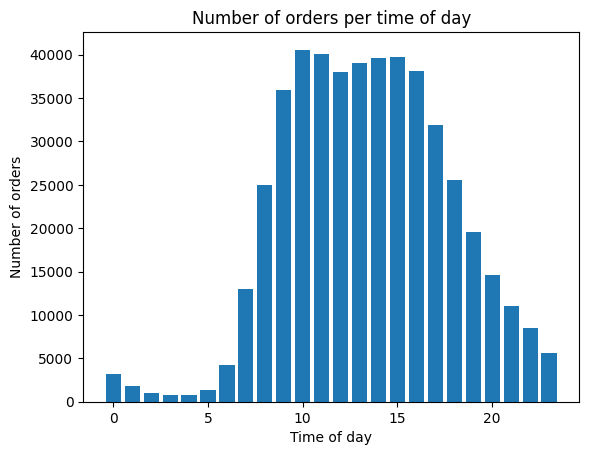

In [56]:
orders_per_hour = insta['order_hour_of_day'].value_counts().sort_index()
plt.bar(orders_per_hour.index, orders_per_hour.values)
plt.xlabel('Time of day')
plt.ylabel('Number of orders')
plt.title('Number of orders per time of day')
plt.show()

# Create a plot that shows which day of the week people do their shopping

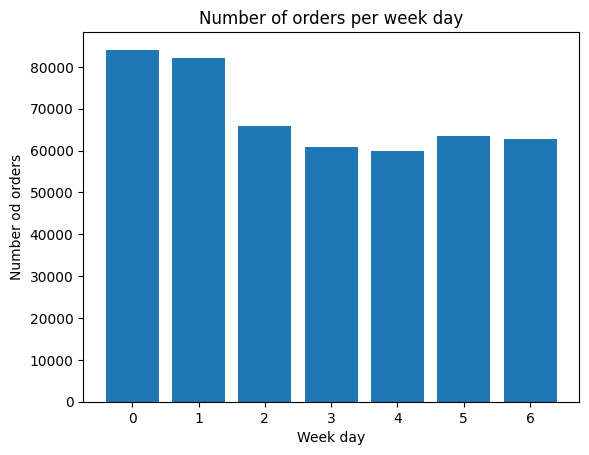

In [57]:
orders_per_day = insta['order_dow'].value_counts().sort_index()
plt.bar(orders_per_day.index, orders_per_day.values)
plt.xlabel('Week day')
plt.ylabel('Number od orders')
plt.title('Number of orders per week day')
plt.show()

# Create a plot that shows the time people wait until making their next order.

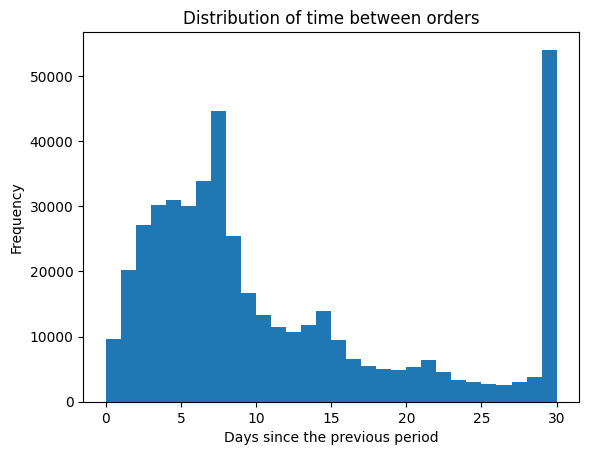

In [58]:
insta['days_since_prior_order'].unique()
filtered_data = insta['days_since_prior_order'].dropna()
filtered_data.plot(kind = 'hist',
                     bins = 30,
                     title = 'Distribution of time between orders',
                     xlabel = 'Days since the previous period',
                     ylabel = 'Frequency')

plt.show()

# Is there any difference between the 'order_hour_of_day' distributions on Wednesdays and Saturdays?

In [59]:
wed = insta[insta['order_dow'] == 3]
sat = insta[insta['order_dow'] == 6]

In [60]:
wed_counts = wed['order_hour_of_day'].value_counts().sort_index()
sat_counts = sat['order_hour_of_day'].value_counts().sort_index()

In [61]:
hours = np.arange(24)
wed_counts = wed_counts.reindex(hours, fill_value=0)
sat_counts = sat_counts.reindex(hours, fill_value=0)

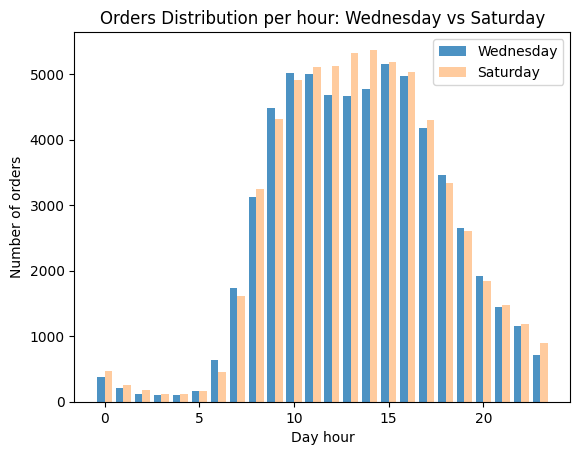

In [62]:
x = hours
width = 0.40
plt.bar(x - width/2, wed_counts, width, label='Wednesday', alpha=0.8)
plt.bar(x + width/2, sat_counts, width, label='Saturday', alpha=0.4)



plt.title("Orders Distribution per hour: Wednesday vs Saturday")


plt.xlabel("Day hour")
plt.ylabel("Number of orders")
plt.legend()
plt.show()

# Plot the distribution for the number of orders made by customers

In [63]:
orders_customer = insta.groupby('user_id')['order_number'].max()
distribution = orders_customer.value_counts()

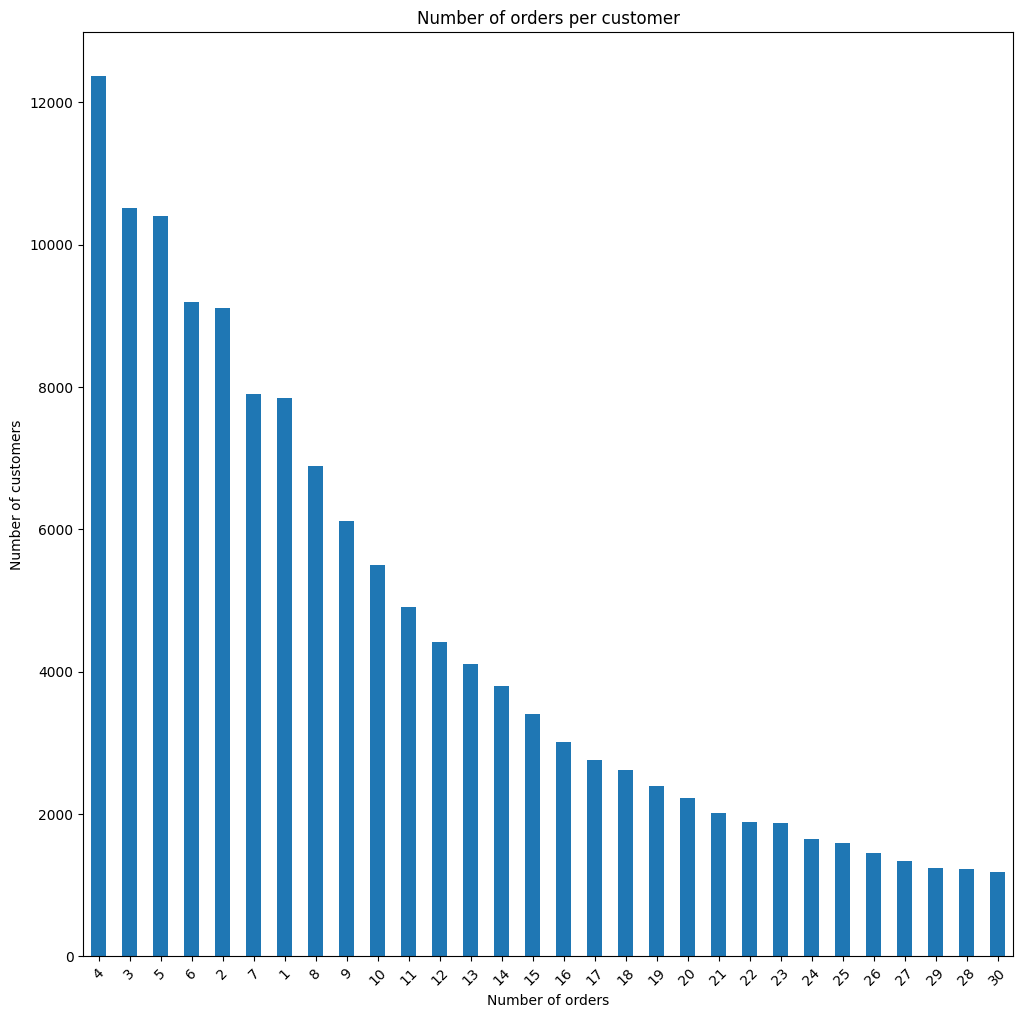

In [64]:
distribution_limited = distribution.head(30)
distribution_limited.plot(kind='bar',
                  xlabel='Number of orders',
                  ylabel='Number of customers',
                  title='Number of orders per customer',
                  rot=45,
                  figsize=[12,12])
plt.show()

# What are the top 20 most frequently ordered products?

In [72]:
top_20 = order['product_id'].value_counts().head(20).reset_index()
top_20.columns = ['product_id', 'count'] 
result = top_20.merge(prod, on='product_id')
print(result)

    product_id  count              product_name  aisle_id  department_id
0        24852  66050                    BANANA        24              4
1        13176  53297    BAG OF ORGANIC BANANAS        24              4
2        21137  37039      ORGANIC STRAWBERRIES        24              4
3        21903  33971      ORGANIC BABY SPINACH       123              4
4        47209  29773      ORGANIC HASS AVOCADO        24              4
5        47766  24689           ORGANIC AVOCADO        24              4
6        47626  21495               LARGE LEMON        24              4
7        16797  20018              STRAWBERRIES        24              4
8        26209  19690                     LIMES        24              4
9        27845  19600        ORGANIC WHOLE MILK        84             16
10       27966  19197       ORGANIC RASPBERRIES       123              4
11       22935  15898      ORGANIC YELLOW ONION        83              4
12       24964  15292            ORGANIC GARLIC    

# How many items do people usually buy in an order?

In [74]:
items_per_order = order.groupby('order_id')['product_id'].count()
distribution = items_per_order.value_counts().sort_index()

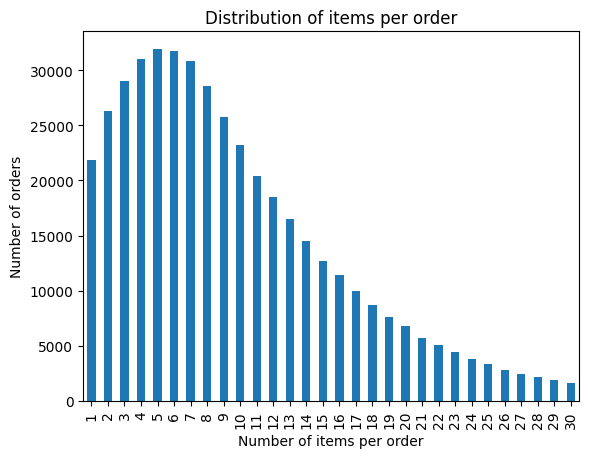

In [75]:
distribution_lim= distribution.head(30)
distribution_lim.plot(kind='bar',
                  xlabel='Number of items per order',
                  ylabel='Number of orders',
                  title='Distribution of items per order')
plt.show()

# What are the top 20 most frequently reordered items?

In [76]:
reordered_products = order[order['reordered'] == 1]
print(f"Total of reordered products: {len(reordered_products)}")

Total of reordered products: 2683838


In [77]:
frequency = reordered_products['product_id'].value_counts().head(20)
print(f"Top 20 of more reordered products: {frequency}")

Top 20 of more reordered products: product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: count, dtype: int64


In [78]:
top_20_reordered = frequency.reset_index()
top_20_reordered.columns = ['product_id', 'reorder_count']

result_top_20 = top_20_reordered.merge(prod[['product_id', 'product_name']], on='product_id')
print("Top 20 more reordered products with names:")
print(result_top_20)

Top 20 more reordered products with names:
    product_id  reorder_count              product_name
0        24852          55763                    BANANA
1        13176          44450    BAG OF ORGANIC BANANAS
2        21137          28639      ORGANIC STRAWBERRIES
3        21903          26233      ORGANIC BABY SPINACH
4        47209          23629      ORGANIC HASS AVOCADO
5        47766          18743           ORGANIC AVOCADO
6        27845          16251        ORGANIC WHOLE MILK
7        47626          15044               LARGE LEMON
8        27966          14748       ORGANIC RASPBERRIES
9        16797          13945              STRAWBERRIES
10       26209          13327                     LIMES
11       22935          11145      ORGANIC YELLOW ONION
12       24964          10411            ORGANIC GARLIC
13       45007          10076          ORGANIC ZUCCHINI
14       49683           9538            CUCUMBER KIRBY
15       28204           8989        ORGANIC FUJI APPLE
16   

# For each product, what is the reorder rate?

In [79]:
total_orders_per_product = order['product_id'].value_counts()
print("Total of orders per product:")
print(total_orders_per_product.head(10))

Total of orders per product:
product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
Name: count, dtype: int64


In [80]:
reorders_per_product = order[order['reordered'] == 1]['product_id'].value_counts()
print("Reorders per product:")
print(reorders_per_product.head(10))

Reorders per product:
product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
Name: count, dtype: int64


In [81]:
reorder_proportion = reorders_per_product / total_orders_per_product
reorder_proportion = reorder_proportion.fillna(0)  

top_20_proportion = reorder_proportion.sort_values(ascending=False).head(20)
print("Top 20 products with more reorder proportion:")
print(top_20_proportion)

Top 20 products with more reorder proportion:
product_id
30644    1.0
8054     1.0
30650    1.0
44747    1.0
44743    1.0
35897    1.0
35834    1.0
2939     1.0
22209    1.0
22213    1.0
22194    1.0
22201    1.0
2970     1.0
22205    1.0
3013     1.0
47814    1.0
47825    1.0
22126    1.0
35797    1.0
44659    1.0
Name: count, dtype: float64


In [82]:
table = reorder_proportion.reset_index()
table.columns = ['product_id', 'reorder_proportion']

final_table = table.merge(prod[['product_id', 'product_name']], on='product_id')


final_table = final_table[['product_id', 'product_name', 'reorder_proportion']]

print("Top 20 products with more reorder proportion:")
print(final_table.sort_values('reorder_proportion', ascending=False).head(20))

Top 20 products with more reorder proportion:
       product_id                                       product_name  \
28108       30644                               ORGANIC FRENCH ROAST   
7340         8054                         BISSLI SMOKEY WHEAT SNACKS   
28114       30650                    MUSHROOM LOVER'S VEGGIE BURGERS   
41002       44747                        FROZEN ORGANIC BLACKBERRIES   
40998       44743                                     REAL ZERO COLA   
32921       35897                                           HAM HOCK   
32861       35834                           BULGARIAN ORGANIC YOGURT   
2684         2939                         CHEDDAR CRUNCHIN' CRACKERS   
20357       22209                       TEMPLES EARL GRAY STRONG TEA   
20361       22213                      2% REDUCED FAT CHOCOLATE MILK   
20343       22194                                           PEAR BAR   
20350       22201                             FRUIT PUNCH RUSH JUICE   
2712         2970 

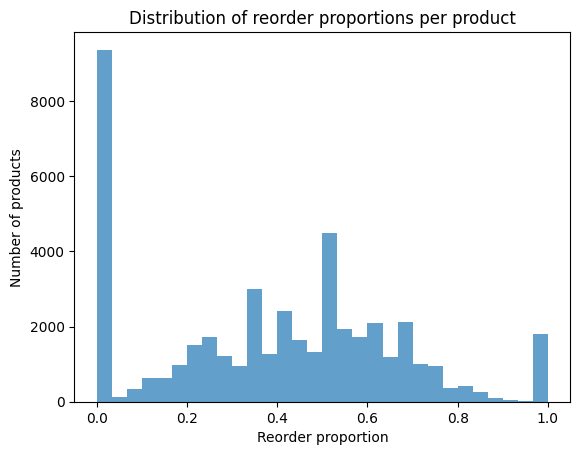

In [83]:
plt.hist(final_table['reorder_proportion'], bins=30, alpha=0.7)
plt.title('Distribution of reorder proportions per product')
plt.xlabel('Reorder proportion')
plt.ylabel('Number of products')
plt.show()

# For each customer, what proportion of the products they ordered had already been ordered before?

In [84]:
complete_data = insta.merge(order, on='order_id')
total_products_per_customer = complete_data.groupby('user_id')['product_id'].nunique()
print("Total of products per customer:")
print(total_products_per_customer.head(10))

Total of products per customer:
user_id
2     25
4      2
5     12
6      4
7     13
11    15
12    12
13    18
14    54
15     8
Name: product_id, dtype: int64


In [85]:
reorders_per_customer = complete_data[complete_data['reordered'] == 1].groupby('user_id')['product_id'].nunique()
print("Reorders per customer:")
print(reorders_per_customer.head(10))

Reorders per customer:
user_id
2      1
5      8
7     12
11     3
12     3
13    11
14    16
15     6
16    12
17    19
Name: product_id, dtype: int64


In [86]:
df_total = total_products_per_customer.to_frame(name='total_orders')
df_reorders = reorders_per_customer.to_frame(name='total_reorders')


repeat_rate_customer = df_total.join(df_reorders, how='left').fillna(0)


repeat_rate_customer['repeat_rate'] = (
    repeat_rate_customer['total_reorders'] / repeat_rate_customer['total_orders']
)

repeat_rate_customer = repeat_rate_customer.sort_values('repeat_rate', ascending=False)

print("Repeat rate per customer:")
print(repeat_rate_customer.head(10))

Repeat rate per customer:
         total_orders  total_reorders  repeat_rate
user_id                                           
206164              1             1.0          1.0
22                  6             6.0          1.0
194572              1             1.0          1.0
194570              1             1.0          1.0
21633               6             6.0          1.0
21671               5             5.0          1.0
194555              7             7.0          1.0
21684               9             9.0          1.0
194634              2             2.0          1.0
194630              3             3.0          1.0


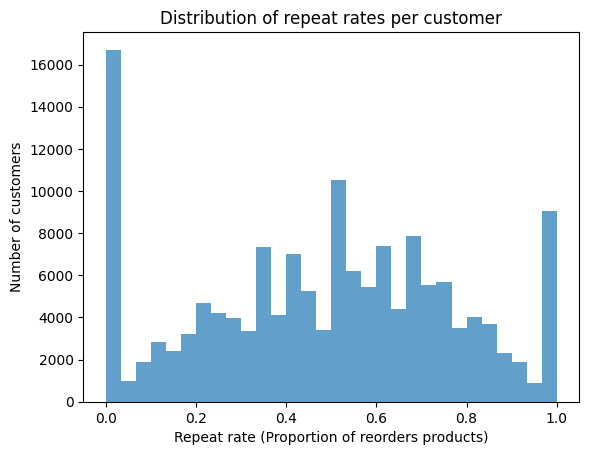

In [87]:
plt.hist(repeat_rate_customer['repeat_rate'], bins=30, alpha=0.7)
plt.title('Distribution of repeat rates per customer')
plt.xlabel('Repeat rate (Proportion of reorders products)')
plt.ylabel('Number of customers')
plt.show()

# What are the top 20 items that people put first in their carts? 

In [90]:
first_item = order[order['add_to_cart_order'] == 1]
counts = first_item['product_id'].value_counts()
top_20_items = counts.head(20).reset_index()
combination = top_20_items.merge(prod[['product_id', 'product_name']], on='product_id')
print(combination)

    product_id  count                 product_name
0        24852  15562                       BANANA
1        13176  11026       BAG OF ORGANIC BANANAS
2        27845   4363           ORGANIC WHOLE MILK
3        21137   3946         ORGANIC STRAWBERRIES
4        47209   3390         ORGANIC HASS AVOCADO
5        21903   3336         ORGANIC BABY SPINACH
6        47766   3044              ORGANIC AVOCADO
7        19660   2336                 SPRING WATER
8        16797   2308                 STRAWBERRIES
9        27966   2024          ORGANIC RASPBERRIES
10       44632   1914   SPARKLING WATER GRAPEFRUIT
11       49235   1797          ORGANIC HALF & HALF
12       47626   1737                  LARGE LEMON
13         196   1733                         SODA
14       38689   1397     ORGANIC REDUCED FAT MILK
15       26209   1370                        LIMES
16       12341   1340                HASS AVOCADOS
17        5785   1310  ORGANIC REDUCED FAT 2% MILK
18       27086   1309          

# Conclusion
Regarding shopping times, users prefer to make their purchases between 10:00 a.m. and 3:00 p.m., especially on weekends when they shop the most. The frequency of orders is due to the fact that most people wait around 30 days to make their purchase. As for product preferences, the trend is toward organic products since they dominate the lists, while fresh products are the most frequently reordered.